In [96]:
import imageio as igio
import matplotlib.pyplot as plt
import numpy as np

In [105]:
def my_fun( filename='frame0.jpg', method='1' ):
#     im_read =igio.imread(filename)
    
    if( method == 1 ):
        im_read =igio.imread(filename)
        print('Limearization')
        im_shape = im_read.shape
        im_size = im_shape[0]*im_shape[1]
        
        counter = np.zeros([1,2])
        counter[0,0] = 0
        counter[0,1] = im_size
        
        T_i = 125
        T = 0
        c = 0
        while( np.abs(T_i - T) > 0.5 ):
            print(str(T_i) + ' - ' + str(T))
            im_read =igio.imread(filename)
            im = im_read
            counter = np.zeros([1,2])
            counter_pix = np.zeros([1,2])
            for i in range(1,im_shape[0]):
                for j in range(1,im_shape[1]):
                    if( im[i,j,0] <= T ):
                        counter_pix[0,0] += im[i,j,0]
#                         im[i,j,0] = 0
                        counter[0,0] += 1
                    else:
                        counter_pix[0,1] += im[i,j,0]
#                         im[i,j,0] = 1
                        counter[0,1] += 1
            
            G1 = counter_pix[0,0] / counter[0,0]
            G2 = counter_pix[0,1] / counter[0,1]
            T = T_i
            T_i = 0.5*(G1+G2)
            print(str(T_i) + ' * ' + str(T))
            
            print( str(G1) + ' ' + str(G2), end = '\n' )
            plt.figure(figsize = (10,10))
            plt.imshow(im[:,:,0]*255, cmap = plt.get_cmap(name = 'gray'))
            plt.colorbar()
            
            c += 1

Limearization
125 - 0
34.43938779758318 * 125
0.0 68.87877559516636
34.43938779758318 - 125
92.89845534574752 * 34.43938779758318
48.821436488583466 136.97547420291158
92.89845534574752 - 34.43938779758318
61.354660570077215 * 92.89845534574752
6.446699541028385 116.26262159912605
61.354660570077215 - 92.89845534574752
66.3309594435227 * 61.354660570077215
10.603492113222552 122.05842677382286
66.3309594435227 - 61.354660570077215
64.55654153047381 * 66.3309594435227
8.571822381165251 120.54126067978237
64.55654153047381 - 66.3309594435227
64.88744584179157 * 64.55654153047381
8.880369215571266 120.89452246801189


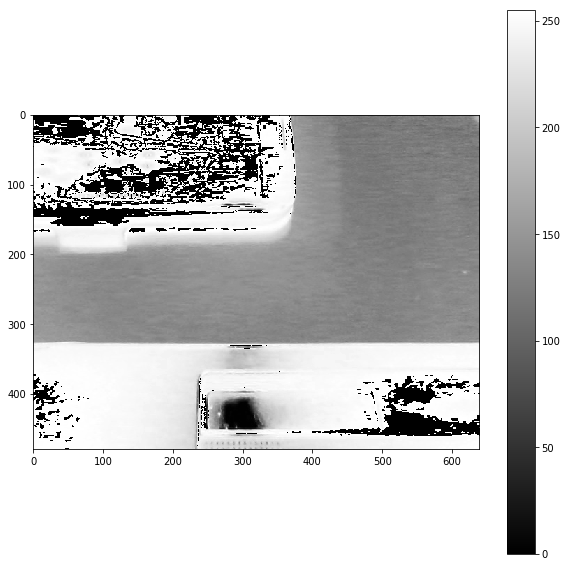

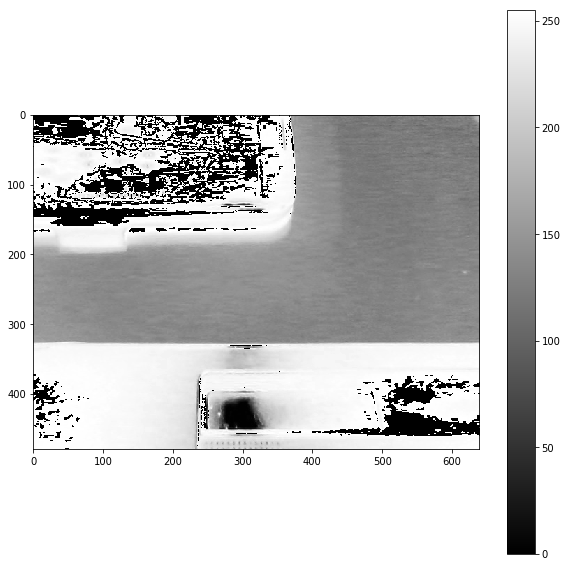

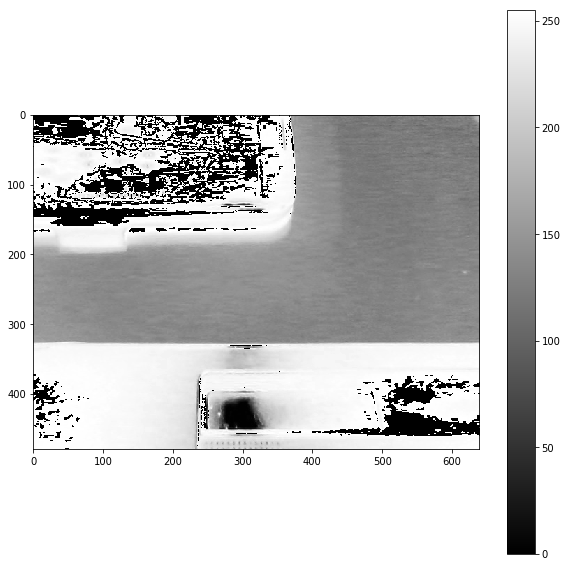

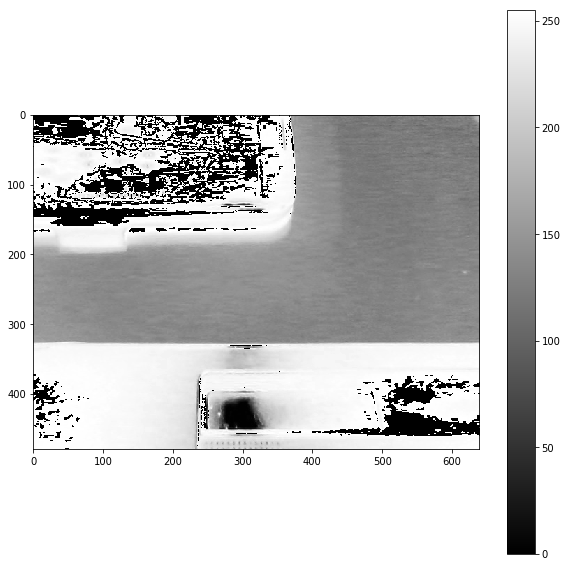

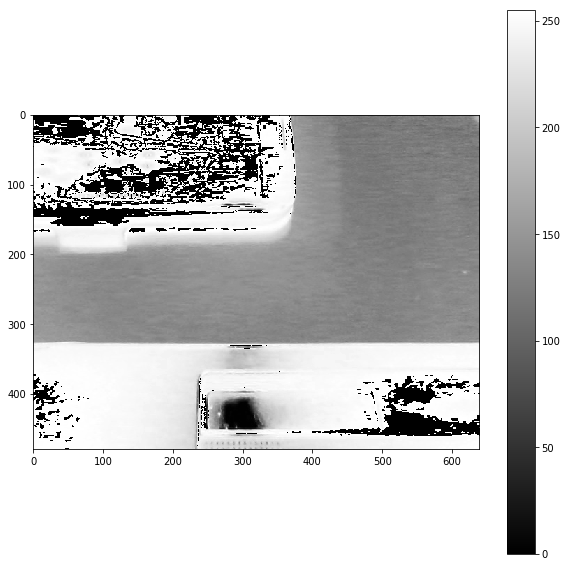

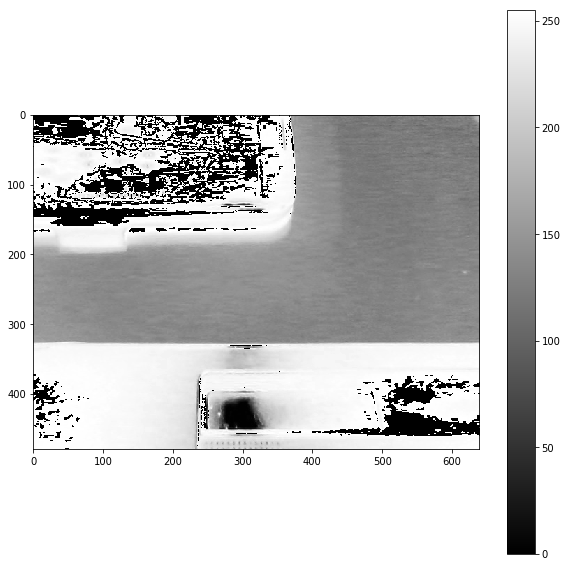

In [106]:
my_fun(method=1)